* Imported Needed Libraries

In [73]:
import numpy as np            
import pandas as pd                   
from sklearn.metrics import confusion_matrix ,classification_report , precision_score , recall_score , f1_score
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler , MinMaxScaler 
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
import warnings
warnings.simplefilter(action='ignore')

* Loaded  Needed Data 
1. Show Data 

In [2]:
data = pd.read_csv('D:\\Array Diploma\\Data\\titanic.csv')
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


* Show Data

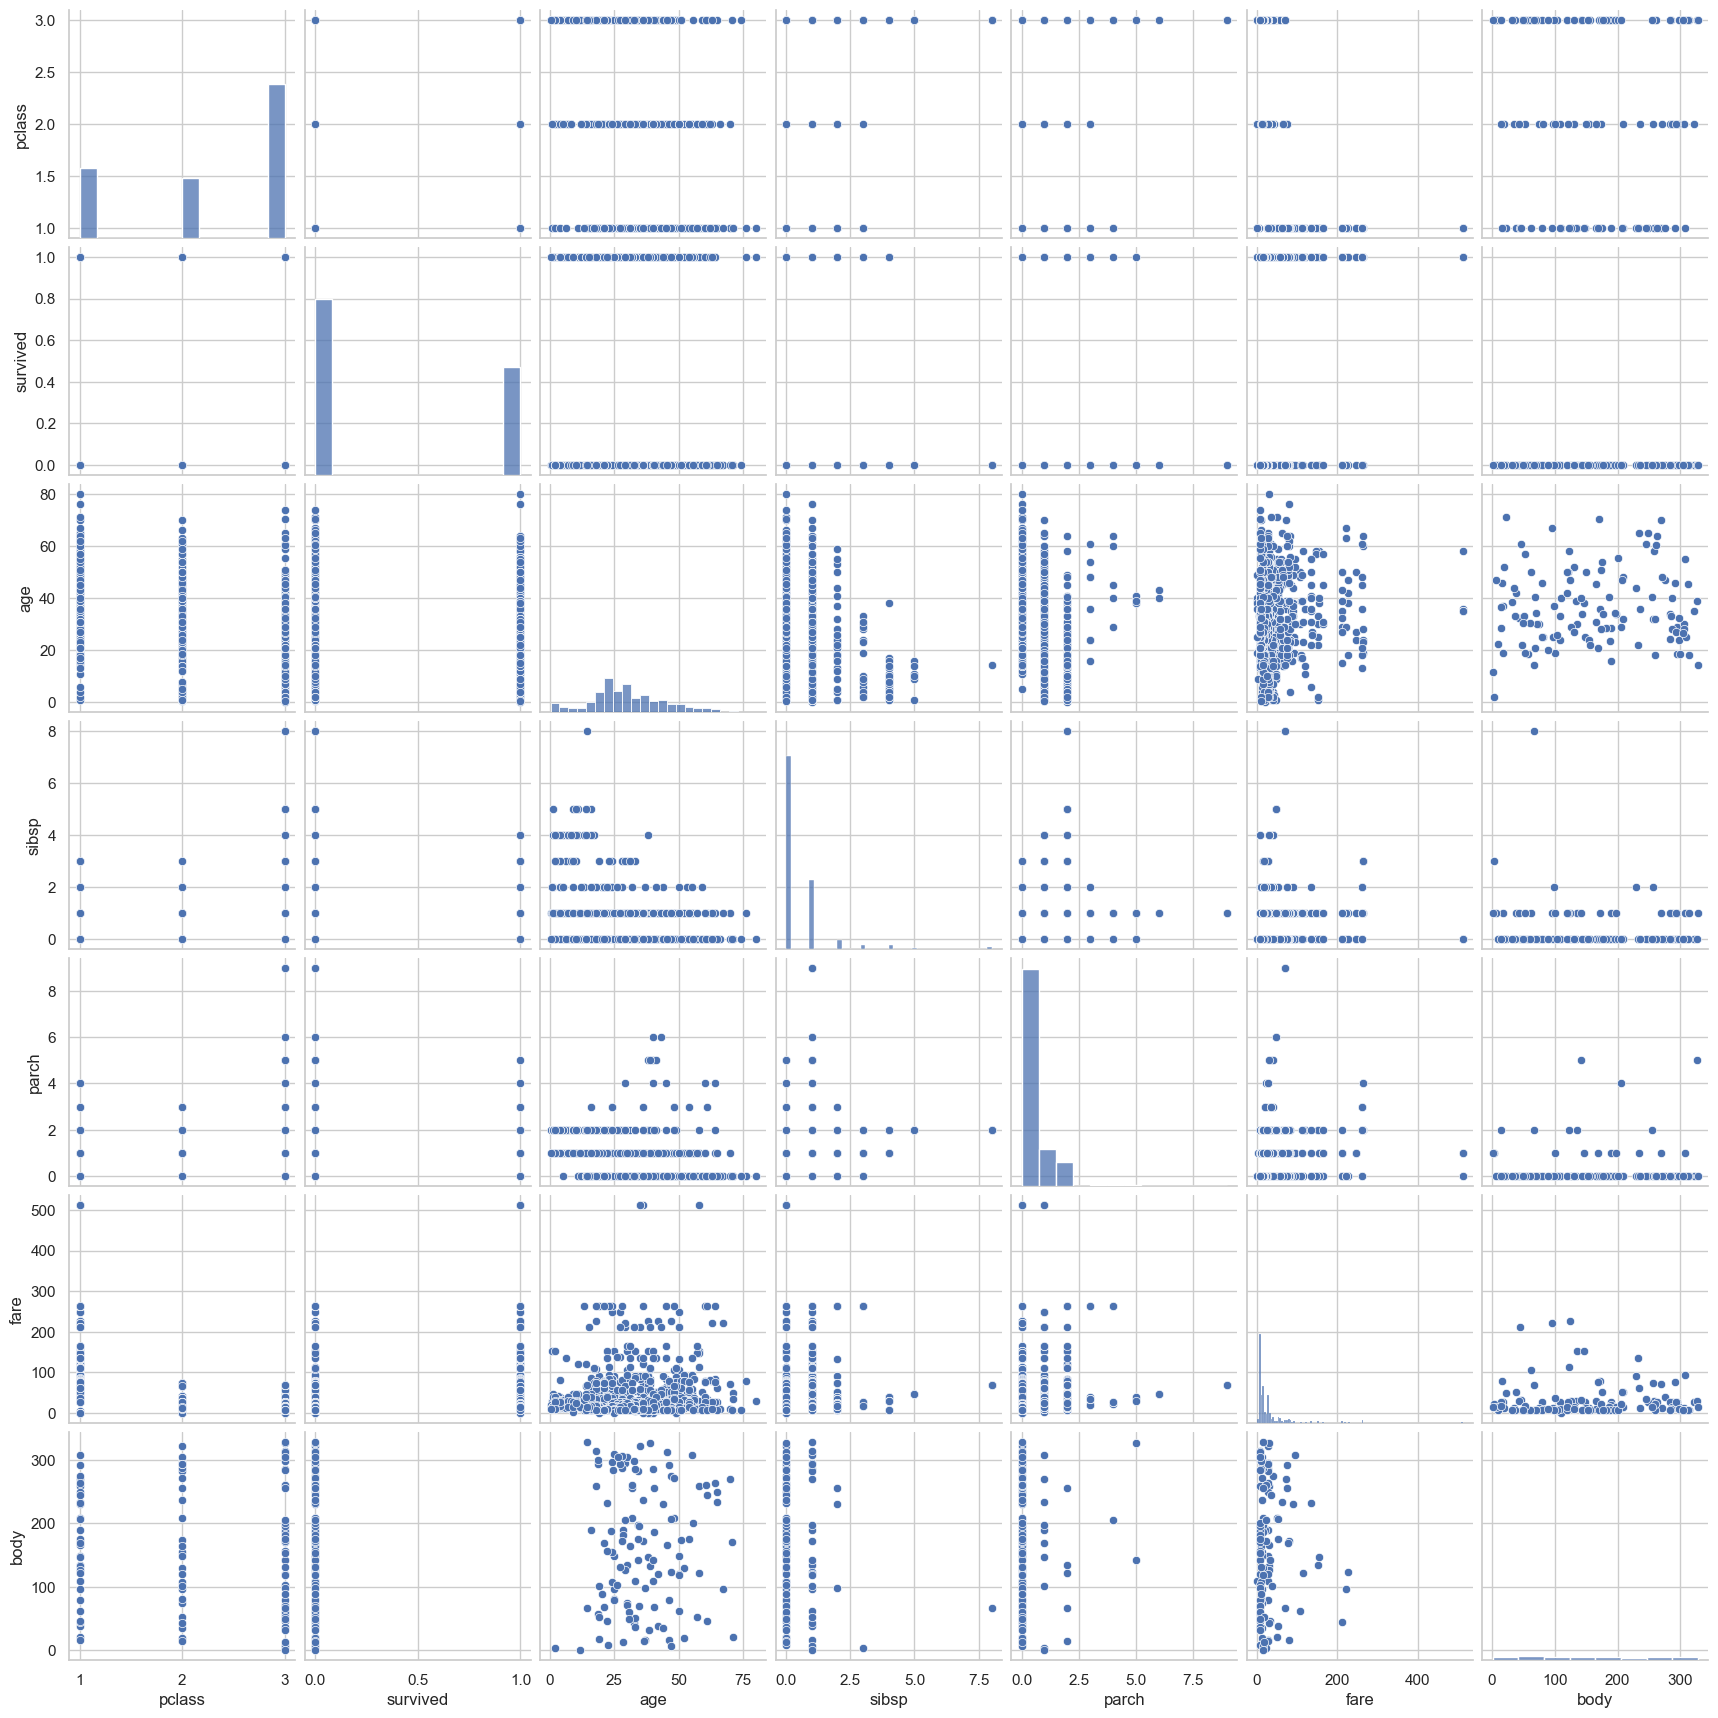

In [3]:
sns.pairplot(data)

In [4]:
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


3. Information For Data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


* Data Quality & Missing Value Assessment

In [6]:
data.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

* Drop NAN Values 

In [7]:
data.dropna(how='all',inplace=True)

* Checking Numbers Of Categories

In [8]:
# first PClass
print('\t\t PCLass Column ')
print(data['pclass'].nunique())
print(data['pclass'].unique())
print('***'*20)
#**************************************************
#Survied Column 
print('\t\t Survived Column ')
print(data['survived'].nunique())
print(data['survived'].unique())
print('***'*20)
#***************************************************
#Gender Column
print('\t\t Sex Column ')
print(data['sex'].nunique())
print(data['sex'].unique())
print('***'*20)
#*****************************************
#Age Column
print('\t\t Age Column ')
print(data['age'].isna().mean()) 
print(data['age'].nunique())
#print(data['age'].unique())
print('***'*20)
#*********************************************
# SibSp
print('\t\t SibSP Column ')
print(data['sibsp'].nunique())
print(data['sibsp'].unique())
print('***'*20)
#***********************************
print('\t\t Parch Column ')
print(data['parch'].nunique())
print(data['parch'].unique())
print('***'*20)
#============================================
print('\t\t Ticket Column ')
print(data['ticket'].nunique())
print(data['ticket'].unique())
print('***'*20)
#=================================================
print('\t\t Fare Column ')
print(data['fare'].nunique())
print(data['fare'].unique())
print('***'*20)
#=================================================
print('\t\t Cabin Column ')
print(data['cabin'].nunique())
print(data['cabin'].unique())
print('***'*20)
#=================================================
print('\t\t Embarked Column ')
print(data['embarked'].nunique())
print(data['embarked'].unique())
print('***'*20)
#=================================================
print('\t\t Boat Column ')
print(data['boat'].nunique())
print(data['boat'].unique())
print('***'*20)
#=================================================
print('\t\t Body Column ')
print(data['body'].nunique())
print(data['body'].unique())
print('***'*20)

		 PCLass Column 
3
[1. 2. 3.]
************************************************************
		 Survived Column 
2
[1. 0.]
************************************************************
		 Sex Column 
2
['female' 'male']
************************************************************
		 Age Column 
0.20091673032849502
98
************************************************************
		 SibSP Column 
7
[0. 1. 2. 3. 4. 5. 8.]
************************************************************
		 Parch Column 
8
[0. 2. 1. 4. 3. 5. 6. 9.]
************************************************************
		 Ticket Column 
929
['24160' '113781' '19952' '13502' '112050' '11769' 'PC 17609' 'PC 17757'
 'PC 17477' '19877' '27042' 'PC 17318' 'PC 17558' '11813' '13050' '11751'
 '111369' 'PC 17483' '13905' '11967' 'PC 17760' '110564' '113784' '112277'
 '36928' '113783' '110489' 'PC 17608' '113505' '111427' '113054'
 'PC 17591' '112379' 'PC 17610' '16966' '113050' '113798' 'PC 17476'
 'PC 17606' 'PC 17755' '695' '11305

* Minimizing Column Size Of PClass

In [9]:
#PClass
data['pclass']=data['pclass'].astype('int8')
#Survied
data['survived'] = data['survived'].astype('int8')
#*************************************************************
data.dropna(subset=['age'],inplace=True)
#==============================================================
#data.loc[:,['sibsp','parch']]=data['pclass'].astype('int8')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1046 non-null   int8   
 1   survived   1046 non-null   int8   
 2   name       1046 non-null   object 
 3   sex        1046 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1046 non-null   float64
 6   parch      1046 non-null   float64
 7   ticket     1046 non-null   object 
 8   fare       1045 non-null   float64
 9   cabin      272 non-null    object 
 10  embarked   1044 non-null   object 
 11  boat       417 non-null    object 
 12  body       120 non-null    float64
 13  home.dest  685 non-null    object 
dtypes: float64(5), int8(2), object(7)
memory usage: 108.3+ KB


In [11]:
data.loc[:,['sibsp','parch']] = data.loc[:,['sibsp','parch']].astype('int8')
print('SIPSB Column Is ==> ',data['sibsp'].unique())
print('ParCH Column Is ==> ',data['parch'].unique())

SIPSB Column Is ==>  [0 1 2 3 4 5 8]
ParCH Column Is ==>  [0 2 1 4 3 5 6]


In [12]:
# Display DataFrame Information 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1046 non-null   int8   
 1   survived   1046 non-null   int8   
 2   name       1046 non-null   object 
 3   sex        1046 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1046 non-null   int8   
 6   parch      1046 non-null   int8   
 7   ticket     1046 non-null   object 
 8   fare       1045 non-null   float64
 9   cabin      272 non-null    object 
 10  embarked   1044 non-null   object 
 11  boat       417 non-null    object 
 12  body       120 non-null    float64
 13  home.dest  685 non-null    object 
dtypes: float64(3), int8(4), object(7)
memory usage: 94.0+ KB


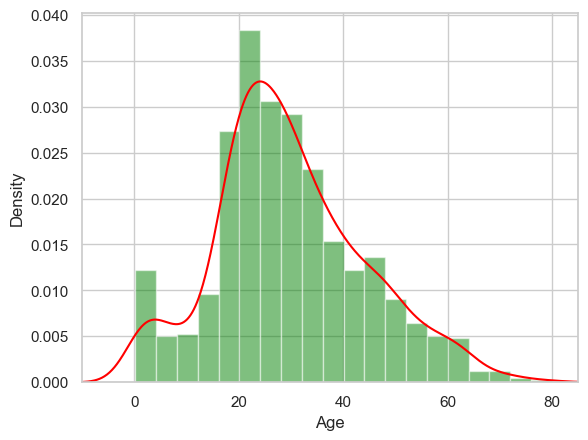

In [13]:
# percent of missing "Age" 
#print('Percent of missing "Age" records is ==>  %.2f%%' %((data['age'].isnull().sum()/data.shape[0])*100))
ax = data["age"].hist(bins=20, density=True, stacked=True, color='green', alpha=0.5)
data["age"].plot(kind='density', color='red')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [14]:
# mean age
print('The mean of "Age" is ==> %.2f' %(data["age"].mean(skipna=True)))
# median age
print('The median of "Age" is ==> %.2f' %(data["age"].median(skipna=True)))
# percent of missing "Cabin" 
print('Percent of missing "Cabin" records is ==> %.2f%%' %((data['cabin'].isnull().sum()/data.shape[0])*100))

The mean of "Age" is ==> 29.88
The median of "Age" is ==> 28.00
Percent of missing "Cabin" records is ==> 74.00%


Percent of missing "Embarked" records is ==>  0.19%
Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
S    782
C    212
Q     50
Name: embarked, dtype: int64


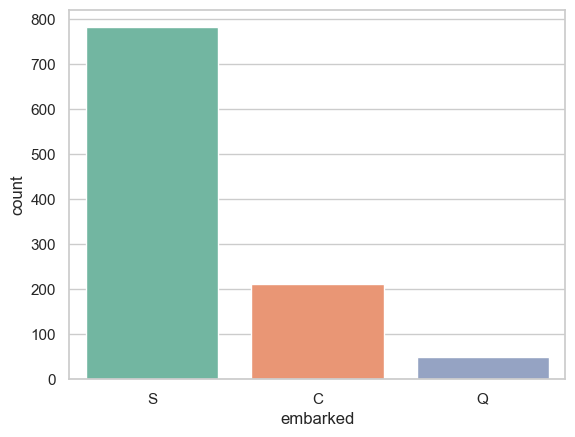

In [15]:
# Show Missing Values For Embarked Column 
# percent of missing "Embarked" 
print('Percent of missing "Embarked" records is ==>  %.2f%%' %((data['embarked'].isnull().sum()/data.shape[0])*100))
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(data['embarked'].value_counts())
sns.countplot(x='embarked', data=data, palette='Set2')
plt.show()

1. The Most Common Embarstation Is ==> S (Southampton)
2. Show The Most Common Value For Survied Column  
3. Show The Most Common Value For Age Column 
4. Show The Most Common Value For Name Column
5. Show The Most Common Value For Sex Column
6. Show The Most Common Value For Boat Column
7. Show The Most Common Value For Home.Dest Column
8. Show The Most Common Value For Cabin Column 
9. Show The Most Common Value For Ticket Column
10. Show The Most Common Value For PClass Column
11. Show The Most Common Value For SIBSP Column
12. Show The Most Common Value For PARCH Column
13. Show The Most Common Value For FARE Column

In [16]:
print('The most common boarding port of embarkation is ==>  %s.' %data['embarked'].value_counts().idxmax())
print('==='*20)
print('The Most Common Value For Survied Column Is  ==>  %.1f .' %data['survived'].value_counts().idxmax())
print('==='*20)
print('The Most Common Value For age Column Is  ==>  %.1f .' %data['age'].value_counts().idxmax())  
print('==='*20)
print('The Most Common Value For Name Column Is ==>  %s.' %data['name'].value_counts().idxmax()) 
print('==='*20)
print('The Most Common Value For Sex Column Is ==>  %s.' %data['sex'].value_counts().idxmax()) 
print('==='*20)
print('The Most Common Value For Boat Column Is ==>  %s.' %data['boat'].value_counts().idxmax()) 
print('==='*20)
print('The Most Common Value For Home.Dest Column Is ==>  %s.' %data['home.dest'].value_counts().idxmax())
print('==='*20)
print('The Most Common Value For Cabin Column Is ==>  %s.' %data['cabin'].value_counts().idxmax()) 
print('==='*20)
print('The Most Common Value For Ticket Column Is ==>  %s.' %data['ticket'].value_counts().idxmax()) 
print('==='*20)
print('The Most Common Value For PClass Column Is  ==>  %.1f .' %data['pclass'].value_counts().idxmax()) 
print('==='*20)
print('The Most Common Value For SIBSP Column Is  ==>  %.1f .' %data['sibsp'].value_counts().idxmax()) 
print('==='*20)
print('The Most Common Value For PARCH Column Is  ==>  %.1f .' %data['parch'].value_counts().idxmax()) 
print('==='*20)
print('The Most Common Value For FARE Column Is  ==>  %.1f .' %data['fare'].value_counts().idxmax())

The most common boarding port of embarkation is ==>  S.
The Most Common Value For Survied Column Is  ==>  0.0 .
The Most Common Value For age Column Is  ==>  24.0 .
The Most Common Value For Name Column Is ==>  Kelly, Mr. James.
The Most Common Value For Sex Column Is ==>  male.
The Most Common Value For Boat Column Is ==>  15.
The Most Common Value For Home.Dest Column Is ==>  New York, NY.
The Most Common Value For Cabin Column Is ==>  C23 C25 C27.
The Most Common Value For Ticket Column Is ==>  CA 2144.
The Most Common Value For PClass Column Is  ==>  3.0 .
The Most Common Value For SIBSP Column Is  ==>  0.0 .
The Most Common Value For PARCH Column Is  ==>  0.0 .
The Most Common Value For FARE Column Is  ==>  13.0 .


In [17]:
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,3,0,"Youseff, Mr. Gerious",male,45.5000,0,0,2628,7.2250,NaN,C,NaN,312.0,NaN
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [18]:
#create categorical variables & Drop Some Columns From Data
data=pd.get_dummies(data, columns=["pclass","embarked","sex"])

In [19]:
data

,survived,name,age,sibsp,parch,ticket,fare,cabin,boat,body,home.dest,pclass_1,pclass_2,pclass_3,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,1,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160,211.3375,B5,2,NaN,"St Louis, MO",1,0,0,0,0,1,1,0
1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.5500,C22 C26,11,NaN,"Montreal, PQ / Chesterville, ON",1,0,0,0,0,1,0,1
2,0,"Allison, Miss. Helen Loraine",2.0000,1,2,113781,151.5500,C22 C26,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0,0,0,0,1,1,0
3,0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1,2,113781,151.5500,C22 C26,NaN,135.0,"Montreal, PQ / Chesterville, ON",1,0,0,0,0,1,0,1
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1,2,113781,151.5500,C22 C26,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,0,"Youseff, Mr. Gerious",45.5000,0,0,2628,7.2250,NaN,NaN,312.0,NaN,0,0,1,1,0,0,0,1
1304,0,"Zabour, Miss. Hileni",14.5000,1,0,2665,14.4542,NaN,NaN,328.0,NaN,0,0,1,1,0,0,1,0
1306,0,"Zakarian, Mr. Mapriededer",26.5000,0,0,2656,7.2250,NaN,NaN,304.0,NaN,0,0,1,1,0,0,0,1
1307,0,"Zakarian, Mr. Ortin",27.0000,0,0,2670,7.2250,NaN,NaN,NaN,NaN,0,0,1,1,0,0,0,1


In [20]:
#Drop Some Columns From Data 
#data.drop('pclass',inplace=True)
data.drop('name', axis=1, inplace=True)
#data.drop('sex', axis=1, inplace=True)
data.drop('ticket', axis=1, inplace=True)
data.drop('cabin', axis=1, inplace=True)
data.drop('home.dest', axis=1, inplace=True)
#data.drop('embarked', axis=1, inplace=True)
#data.drop(['pclass', 'name','sex','ticket','cabin','home.dest','embarked'],axis=1)

* Applying Logestic Regression For Data 
1. Create Model 
2. Seperating Independant and Dependant Data
3. Splitting For Data (Train - Test )

In [21]:
data

,survived,age,sibsp,parch,fare,boat,body,pclass_1,pclass_2,pclass_3,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,1,29.0000,0,0,211.3375,2,NaN,1,0,0,0,0,1,1,0
1,1,0.9167,1,2,151.5500,11,NaN,1,0,0,0,0,1,0,1
2,0,2.0000,1,2,151.5500,NaN,NaN,1,0,0,0,0,1,1,0
3,0,30.0000,1,2,151.5500,NaN,135.0,1,0,0,0,0,1,0,1
4,0,25.0000,1,2,151.5500,NaN,NaN,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,0,45.5000,0,0,7.2250,NaN,312.0,0,0,1,1,0,0,0,1
1304,0,14.5000,1,0,14.4542,NaN,328.0,0,0,1,1,0,0,1,0
1306,0,26.5000,0,0,7.2250,NaN,304.0,0,0,1,1,0,0,0,1
1307,0,27.0000,0,0,7.2250,NaN,NaN,0,0,1,1,0,0,0,1


In [29]:
data.drop('boat', axis=1, inplace=True)
data

,survived,age,sibsp,parch,fare,body,pclass_1,pclass_2,pclass_3,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,1,29.0000,0,0,211.3375,NaN,1,0,0,0,0,1,1,0
1,1,0.9167,1,2,151.5500,NaN,1,0,0,0,0,1,0,1
2,0,2.0000,1,2,151.5500,NaN,1,0,0,0,0,1,1,0
3,0,30.0000,1,2,151.5500,135.0,1,0,0,0,0,1,0,1
4,0,25.0000,1,2,151.5500,NaN,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,0,45.5000,0,0,7.2250,312.0,0,0,1,1,0,0,0,1
1304,0,14.5000,1,0,14.4542,328.0,0,0,1,1,0,0,1,0
1306,0,26.5000,0,0,7.2250,304.0,0,0,1,1,0,0,0,1
1307,0,27.0000,0,0,7.2250,NaN,0,0,1,1,0,0,0,1


In [31]:
# Show Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    1046 non-null   int8   
 1   age         1046 non-null   float64
 2   sibsp       1046 non-null   int8   
 3   parch       1046 non-null   int8   
 4   fare        1045 non-null   float64
 5   body        120 non-null    float64
 6   pclass_1    1046 non-null   uint8  
 7   pclass_2    1046 non-null   uint8  
 8   pclass_3    1046 non-null   uint8  
 9   embarked_C  1046 non-null   uint8  
 10  embarked_Q  1046 non-null   uint8  
 11  embarked_S  1046 non-null   uint8  
 12  sex_female  1046 non-null   uint8  
 13  sex_male    1046 non-null   uint8  
dtypes: float64(3), int8(3), uint8(8)
memory usage: 43.9 KB


In [35]:
data.drop('body', axis=1, inplace=True)
data

,survived,age,sibsp,parch,fare,pclass_1,pclass_2,pclass_3,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,1,29.0000,0,0,211.3375,1,0,0,0,0,1,1,0
1,1,0.9167,1,2,151.5500,1,0,0,0,0,1,0,1
2,0,2.0000,1,2,151.5500,1,0,0,0,0,1,1,0
3,0,30.0000,1,2,151.5500,1,0,0,0,0,1,0,1
4,0,25.0000,1,2,151.5500,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,0,45.5000,0,0,7.2250,0,0,1,1,0,0,0,1
1304,0,14.5000,1,0,14.4542,0,0,1,1,0,0,1,0
1306,0,26.5000,0,0,7.2250,0,0,1,1,0,0,0,1
1307,0,27.0000,0,0,7.2250,0,0,1,1,0,0,0,1


In [41]:
#Fill NAN Value For Fare Column By Using Median 
print('The Mean For Fare Column Is ==> ',data['fare'].mean()) # 36.68608028708134
print('The Median For Fare Column Is ==> ',data['fare'].median()) #15.75
print('The Mode For Fare Column Is ==> ',data['fare'].mode()) # 0    13.0
print('***'*30)
#Fill Nan Value 
data['fare'] = data['fare'].fillna(value = data['fare'].median())

The Mean For Fare Column Is ==>  36.68608028708134
The Median For Fare Column Is ==>  15.75
The Mode For Fare Column Is ==>  0    13.0
Name: fare, dtype: float64
******************************************************************************************


In [42]:
data.dropna(how='all',inplace=True)
data.isnull().sum()

survived      0
age           0
sibsp         0
parch         0
fare          0
pclass_1      0
pclass_2      0
pclass_3      0
embarked_C    0
embarked_Q    0
embarked_S    0
sex_female    0
sex_male      0
dtype: int64

# 1- One Algorithm Used For Implement Model (SVM.SVC)
* One Step For Used (Metrices)

In [77]:
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split 
x = data.iloc[:,1:]
y = data.iloc[:,0]
print('The Shape Of X Data Is ==> ',x.shape)
print('The Shape Of Y Data Is ==> ',y.shape)
# Splitting Data To ( Train - Test )
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print('****'*30)
SVC_Model = SVC(C=1.01,kernel='linear',degree=5,max_iter=50000,tol=0.0001)
SVC_Model.fit(x_train,y_train)
print('The Accuracy Or Score For SVC Model For Train Data Is ==> ',SVC_Model.score(x_train,y_train))
print('The Accuracy Or Score For SVC Model For Test Data Is ==> ',SVC_Model.score(x_test,y_test))
#Calculating Prediction
y_pred = SVC_Model.predict(x_test)
print('The Real Value For SVC Model Is ==>      ',list(y_test[:50]))
print('The Predicted Value For SVC Model Is ==> ',list(y_pred[:50]))
print('****'*30)

The Shape Of X Data Is ==>  (1046, 12)
The Shape Of Y Data Is ==>  (1046,)
************************************************************************************************************************
The Accuracy Or Score For SVC Model For Train Data Is ==>  0.7894736842105263
The Accuracy Or Score For SVC Model For Test Data Is ==>  0.7476190476190476
The Real Value For SVC Model Is ==>       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0]
The Predicted Value For SVC Model Is ==>  [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]
************************************************************************************************************************


In [79]:
CM = confusion_matrix(y_test,y_pred)
print('\t\t The Confusion Matrix Is : \n',CM)
print('****'*30)
#Calculate The Precision And Recall And F1Score 
# 1. Precision Score 
Precision = precision_score(y_test,y_pred,average='binary')
#2. Recall Score 
Recall = recall_score(y_test,y_pred,average='macro')
#3. F1 Score
F1_Score = f1_score(y_test,y_pred,average='micro')
print('The Precision Score Is ==> ',Precision)
print('The Recall Score Is ==> ',Recall)
print('The Accuracy Of Algorithm By Using F1_Score Is ==> ',F1_Score)
print('****'*30)
#Roc Curve 
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=2)
print('The Value Of False Positive Rate (specificity) Is ==> ',fpr)
print('The Value Of True Positive Rate (sensitivity) Is ==> ',tpr)
print('The Value Of Threshold Rate Is ==> ',thresholds)

		 The Confusion Matrix Is : 
 [[107  26]
 [ 27  50]]
************************************************************************************************************************
The Precision Score Is ==>  0.6578947368421053
The Recall Score Is ==>  0.726930963773069
The Accuracy Of Algorithm By Using F1_Score Is ==>  0.7476190476190476
************************************************************************************************************************
The Value Of False Positive Rate (specificity) Is ==>  [0.         0.36190476 1.        ]
The Value Of True Positive Rate (sensitivity) Is ==>  [nan nan nan]
The Value Of Threshold Rate Is ==>  [2 1 0]


# 2- Use Logestic Regression For Implement Model

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
x1 = data.iloc[:,1:]
y1 = data.iloc[:,0]
print('The Shape Of X Data Is ==> ',x1.shape)
print('The Shape Of Y Data Is ==> ',y1.shape)
# Splitting Data To ( Train - Test )
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.2,random_state=0)
print('****'*30)
#Applying Logestic Regression Algorithm
LR =LogisticRegression(penalty='l1',tol=0.0001,n_jobs=-1,max_iter=50000,solver='saga',C=1.0,random_state=0)
LR.fit(x1_train,y1_train)

The Shape Of X Data Is ==>  (1046, 12)
The Shape Of Y Data Is ==>  (1046,)
************************************************************************************************************************


LogisticRegression(max_iter=50000, n_jobs=-1, penalty='l1', random_state=0,
                   solver='saga')

* Show Results From Model After Aplying Logestic Regression Algorithm For Data

In [117]:
#Calculating Details
print('LogisticRegressionModel Train Score is ==>  ' , LR.score(x1_train, y1_train))
print('LogisticRegressionModel Test Score is  ==> '  , LR.score(x1_test, y1_test))
print('LogisticRegressionModel Classes are    ==> '  , LR.classes_)
print('LR_Model No. of iteratios is           ==> '  , LR.n_iter_)
print('----------------------------------------------------')
#Calculating Prediction
y1_pred = LR.predict(x1_test)
#y_pred_prob = LR.predict_proba(x1_test)
print('Real Value for LogisticRegressionModel is   ==> ' , list(y1_test[:50]))
print('Predicted Value for LogisticRegressionModel ==> ' , list(y1_pred[:50]))
#print('Prediction Probabilities Value for LogisticRegressionModel is : ' , list(y_pred_prob[:10]))

LogisticRegressionModel Train Score is ==>   0.7811004784688995
LogisticRegressionModel Test Score is  ==>  0.7571428571428571
LogisticRegressionModel Classes are    ==>  [0 1]
LR_Model No. of iteratios is           ==>  [3679]
----------------------------------------------------
Real Value for LogisticRegressionModel is   ==>  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0]
Predicted Value for LogisticRegressionModel ==>  [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]


In [118]:
CM1 = confusion_matrix(y1_test,y1_pred)
print('\t\t The Confusion Matrix Is : \n',CM1)
print('****'*30)
#Calculate The Precision And Recall And F1Score 
# 1. Precision Score 
Precision1 = precision_score(y1_test,y1_pred,average='binary')
#2. Recall Score 
Recall1 = recall_score(y1_test,y1_pred,average='macro')
#3. F1 Score
F1_Score1 = f1_score(y1_test,y1_pred,average='micro')
print('The Precision Score Is ==> ',Precision1)
print('The Recall Score Is ==> ',Recall1)
print('The Accuracy Of Algorithm By Using F1_Score Is ==> ',F1_Score1)
print('****'*30)
#Roc Curve 
from sklearn.metrics import roc_curve
fpr1, tpr1, thresholds1 = roc_curve(y1_test, y1_pred, pos_label=2)
print('The Value Of False Positive Rate (specificity) Is ==> ',fpr1)
print('The Value Of True Positive Rate (sensitivity) Is ==> ',tpr1)
print('The Value Of Threshold Rate Is ==> ',thresholds1)

		 The Confusion Matrix Is : 
 [[103  30]
 [ 21  56]]
************************************************************************************************************************
The Precision Score Is ==>  0.6511627906976745
The Recall Score Is ==>  0.7508544087491456
The Accuracy Of Algorithm By Using F1_Score Is ==>  0.7571428571428571
************************************************************************************************************************
The Value Of False Positive Rate (specificity) Is ==>  [0.         0.40952381 1.        ]
The Value Of True Positive Rate (sensitivity) Is ==>  [nan nan nan]
The Value Of Threshold Rate Is ==>  [2 1 0]


# 3- Used Neural Networks For Applying Classification For Model 

In [195]:
from sklearn.neural_network import MLPClassifier
x2 = data.iloc[:,1:]
y2 = data.iloc[:,0]
print('The Shape Of X Data Is ==> ',x1.shape)
print('The Shape Of Y Data Is ==> ',y1.shape)
# Splitting Data To ( Train - Test )
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size=0.2,random_state=0)
#Applying Neural Networks Classifier
print('***'*30)
NN_Model = MLPClassifier(hidden_layer_sizes=(155,7),activation='relu',max_iter=50000,alpha=0.02,tol=0.00003,)
NN_Model.fit(x2_train,y2_train)
#Calculating Details
print('MLPClassifierModel Train Score is ==> ' , NN_Model.score(x2_train, y2_train))
print('MLPClassifierModel Test Score is  ==> '  , NN_Model.score(x2_test, y2_test))
print('MLPClassifierModel loss is        ==> '  , NN_Model.loss_)
print('MLPClassifierModel No. of iterations is ==>  ' , NN_Model.n_iter_)
print('MLPClassifierModel No. of layers is ==>  ' , NN_Model.n_layers_)
print('MLPClassifierModel last activation is ==>  ' , NN_Model.out_activation_)

The Shape Of X Data Is ==>  (1046, 12)
The Shape Of Y Data Is ==>  (1046,)
******************************************************************************************
MLPClassifierModel Train Score is ==>  0.8145933014354066
MLPClassifierModel Test Score is  ==>  0.8238095238095238
MLPClassifierModel loss is        ==>  0.42552028988817214
MLPClassifierModel No. of iterations is ==>   113
MLPClassifierModel No. of layers is ==>   4
MLPClassifierModel last activation is ==>   logistic


In [196]:
#Calculating Prediction
y_pred2 = NN_Model.predict(x2_test)
y_pred_prob2 = NN_Model.predict_proba(x2_test)
print('Real Value for MLPClassifier is   ==> '       , list(y2_test[:50]))
print('Predicted Value for MLPClassifierModel is : ' , list(y_pred2[:50]))
print('Prediction Probabilities Value for MLPClassifierModel is : ' , y_pred_prob2[:10])

Real Value for MLPClassifier is   ==>  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0]
Predicted Value for MLPClassifierModel is :  [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
Prediction Probabilities Value for MLPClassifierModel is :  [[0.88677022 0.11322978]
 [0.7341875  0.2658125 ]
 [0.87051263 0.12948737]
 [0.83967811 0.16032189]
 [0.8376437  0.1623563 ]
 [0.75849084 0.24150916]
 [0.41748113 0.58251887]
 [0.23934039 0.76065961]
 [0.84869507 0.15130493]
 [0.88330372 0.11669628]]


In [197]:
CM2 = confusion_matrix(y2_test,y_pred2)
print('\t\t The Confusion Matrix Is : \n',CM2)
print('****'*30)
#Calculate The Precision And Recall And F1Score 
# 1. Precision Score 
Precision2 = precision_score(y2_test,y_pred2,average='binary')
#2. Recall Score 
Recall2 = recall_score(y2_test,y_pred2,average='macro')
#3. F1 Score
F1_Score2 = f1_score(y2_test,y_pred2,average='micro')
print('The Precision Score Is ==> ',Precision2)
print('The Recall Score Is ==> ',Recall2)
print('The Accuracy Of Algorithm By Using F1_Score Is ==> ',F1_Score2*100)
print('****'*30)
#Roc Curve 
from sklearn.metrics import roc_curve
fpr2, tpr2, thresholds2 = roc_curve(y2_test, y_pred2, pos_label=2)
print('The Value Of False Positive Rate (specificity) Is ==> ',fpr2)
print('The Value Of True Positive Rate (sensitivity) Is ==> ',tpr2)
print('The Value Of Threshold Rate Is ==> ',thresholds2)

		 The Confusion Matrix Is : 
 [[118  15]
 [ 22  55]]
************************************************************************************************************************
The Precision Score Is ==>  0.7857142857142857
The Recall Score Is ==>  0.8007518796992481
The Accuracy Of Algorithm By Using F1_Score Is ==>  82.38095238095238
************************************************************************************************************************
The Value Of False Positive Rate (specificity) Is ==>  [0.         0.33333333 1.        ]
The Value Of True Positive Rate (sensitivity) Is ==>  [nan nan nan]
The Value Of Threshold Rate Is ==>  [2 1 0]
